In [1]:
#!pip install fastai==2.0
import fastai
fastai.__version__

'2.3.1'

In [2]:
from fastai.vision.all import *              # The asterisk '*' here mean everything.
from fastai.metrics import accuracy

In [3]:
path = "dataset/train"

data = ImageDataLoaders.from_folder(path,                              # Path refers to where the folder containing the files is. 
                                    
                                    valid_pct = 0.3,                   # This refers to the ratio of validation data the model would test itself on.          
                                   
                                    bs = 4,                            # bs refers to Batch Size.
                                    
                                    shuffle_train = True,              # This shuffles the data before grabbing batches.
                                   
                                    item_tfms = Resize(512),           # item_tfms transforms the images to to the given specifications before 
                                                                       #  grabbing batches.
                                   
                                    batch_tfms = aug_transforms(       # batch_tfms transforms the batches.
                                        size = 256, min_scale = 0.75))

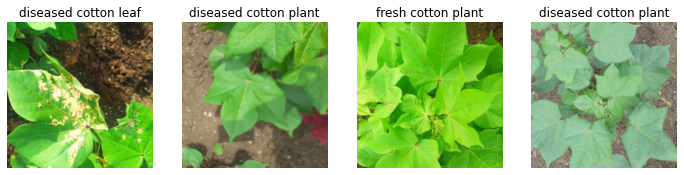

In [4]:
data.show_batch(nrows = 1, ncols = 4)

In [5]:
# Use densenet201 pre-trained model
learner = cnn_learner(data,densenet201,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /Users/himanshubhusan.rath/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100.0%


In [7]:
# Training for 5 epochs - The below 3 lines will not work properly in local as we don't have GPU


#learner.fine_tune(5)
#interpretations = ClassificationInterpretation.from_learner(learner)
#interpretations.plot_confusion_matrix(figsize=(12,12),dpi=60)

## Predict using the model

Note: We have trained the model in Google Colab and have saved the model. We will use that model here in local 
to predict

In [9]:
model = load_learner('model/cotton_disease_densenet-model.h5')

Image is of a fresh cotton plant.


tensor([3.4578e-05, 1.1351e-03, 5.7603e-04, 9.9825e-01])

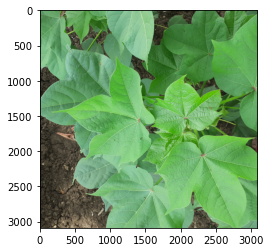

In [18]:
# Choose the image to test
image_path = 'dataset/test/diseased cotton leaf/dis_leaf (124).jpg'
image_path = 'dataset/test/diseased cotton plant/dd (367).jpg'
image_path = 'dataset/test/fresh cotton leaf/d (341).jpg'
image_path = 'dataset/test/fresh cotton plant/dsd (228).jpg'

img = plt.imread(image_path)

classofimg, idx, probability = model.predict(img)

print("Image is of a",classofimg + ".")\

#plt.imshow(img)